# CIFAR-10 Dataset

Importing necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To ignore Warnings

import warnings             
warnings.filterwarnings('ignore')

In [2]:
# Function to unpickle data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [6]:
# Load data from batch 4

data_batch4 = unpickle('data_batch_4')

In [7]:
type(data_batch4)   #checking datatype of file

dict

In [8]:
len(data_batch4)   #checking length of data_batch5

4

In [9]:
data_batch4[b'data'].shape    #Check the shape of the image data

(10000, 3072)

In [10]:
data_batch4[b'data'][0]      

array([178, 178, 178, ...,  80,  80,  77], dtype=uint8)

In [11]:
image=data_batch4[b'data'][0]      #Extract and reshape the image data
image=image.reshape(3,32,32)
image

array([[[178, 178, 178, ..., 170, 168, 165],
        [180, 179, 180, ..., 173, 171, 168],
        [177, 177, 178, ..., 171, 169, 167],
        ...,
        [112, 113, 114, ..., 100,  98, 101],
        [112, 112, 113, ..., 102, 102, 102],
        [103, 100, 103, ...,  92,  93,  91]],

       [[176, 176, 176, ..., 168, 166, 163],
        [178, 177, 178, ..., 171, 169, 166],
        [175, 175, 176, ..., 169, 167, 165],
        ...,
        [107, 109, 110, ...,  97,  94,  95],
        [102, 103, 103, ...,  95,  93,  92],
        [ 96,  93,  95, ...,  84,  86,  84]],

       [[189, 189, 189, ..., 180, 177, 174],
        [191, 190, 191, ..., 182, 180, 177],
        [188, 188, 189, ..., 180, 178, 176],
        ...,
        [107, 108, 110, ...,  94,  93,  95],
        [101, 102, 103, ...,  93,  91,  91],
        [ 92,  90,  94, ...,  80,  80,  77]]], dtype=uint8)

In [13]:
# Reshape the entire dataset and transpose dimensions

data=data_batch4[b'data']
labels = data_batch4[b'labels']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)

#Display the Shape of the reshaped data

print(data.shape)    


(10000, 32, 32, 3)


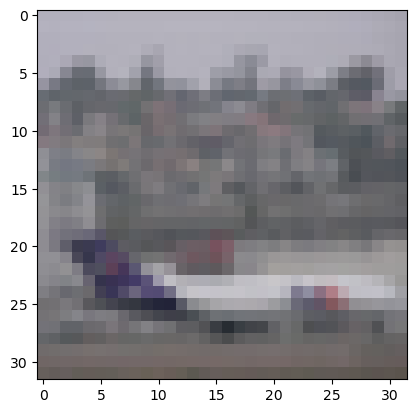

In [14]:
plt.imshow(data[0])  # Display the first image

In [15]:
batch_no=4

In [16]:
data_list=[]

In [17]:
# Create a list for data in the desired format for a DataFrame

for i in range(len(data)):
    d1=data[i].flatten()
    labels = data_batch4[b'labels']
    
    label= labels[i] #Extract the label (assuming it's a 1D array)
    
    data_list.append([label]+list(d1))
    

In [18]:
labels = data_batch4[b'labels']   # Creating a list of labels
#print(labels)

In [19]:
# Define column names for the DataFrame

column1=['label']+[f'Pixel_{i}' for i in range(len(data_list[0])-1)]

In [20]:
df=pd.DataFrame(data_list,columns=column1)   # Create a DataFrame

In [21]:
df.shape      #Shape of the DataFrame

(10000, 3073)

In [25]:
# Save the DataFrame to a CSV file

csv_filename = f'cifar10_batch_{batch_no}.csv'
df.to_csv("Batch_4.csv", index=False)

In [26]:
df.head(5)   #Display the shape and the first 5 rows of the DataFrame

,label,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,0,-78,-80,-67,-78,-80,-67,-78,-80,-67,...,80,92,84,80,93,86,80,91,84,77
1,6,29,43,10,22,36,4,25,37,16,...,29,22,26,29,24,28,31,23,27,30
2,0,36,65,102,33,55,108,21,47,118,...,-81,-74,-80,-83,-75,-84,-86,-76,-84,-86
3,2,30,75,23,45,95,39,44,94,35,...,107,120,-126,106,118,123,99,-98,-96,-109
4,7,35,55,42,80,100,85,89,109,91,...,104,123,-114,107,122,-123,110,101,108,92


In [27]:
df.ndim    #Check dimensionality of data frame

2